In [1]:
from matplotlib import pyplot
#2x+y
# Data de ejemplo
# f_obj = [2,1]
# ineq = [[2,0],[3,1],[0,3],[0,1]]
# ineq_s = [0,1,0,1]
# ineq_r = [20,5,8,2]


## Recopilar datos

In [2]:
def extract_eq(eq_str):
    
    eq_str = eq_str.split()
    #print(eq_str)
    a = 0
    b = 0
    s = 0
    r = 0
    for i in range(len(eq_str)):
        if "x" in eq_str[i]:
            if eq_str[i]== "x":
                a = 1
            else:
                a = int(eq_str[i][0:len(eq_str[i])-1])

        if "y" in eq_str[i]:
            if eq_str[i]== "y":
                b = 1
            else:
                b = int(eq_str[i][0:len(eq_str[i])-1])

        if "<=" in eq_str[i]:
            s = 0

        if ">=" in eq_str[i]:
            s = 1

        if "<=" in eq_str[i] or ">=" in eq_str[i]:
            r = int(eq_str[i+1])
            
    print("extract: {}, {} ,{} ,{}".format(a , b , s, r))
    return a , b , s, r



In [3]:
def input_data():
    f_obj = []
    ineq  = []
    ineq_s = [] 
    ineq_r = []
    obj_a = int(input("Según la funcion objetivo ax+by introduce a:"))
    obj_b = int(input("Según la funcion objetivo ax+by introduce b:"))
    f_obj = [obj_a,obj_b]
    n = int(input("Cuantas inecuaciones desea ingresar [3,8]"))
    for i in range(n):
        print("Inequacion Número {}:".format(i+1))
        
        inequation = input("Ingrese inecuación: (Ej: 2x + 3y <= 4 o 10x + 2y >= 4)")
        
        a , b , s ,r = extract_eq(inequation)
        #print("Valores obtenidos:")
        #print(a,b,s,r)
        ineq.append([a,b])
        ineq_s.append(s)
        ineq_r.append(r)
        
    return f_obj , ineq , ineq_s , ineq_r





## Representar la inecuacion como un string según los datos recopilados

In [4]:
#Según los datos recogidos te grafica el array
def create_label(a , b , s , r):
    print(a,b,s,r)
    ineq_label = "" 
    
    if a == 1:
        ineq_label = ineq_label + "x"
    elif a > 1:
        ineq_label = ineq_label + "{}x".format(a)
    if 0< a and 0 <b:
        ineq_label = ineq_label + " + "
    if b == 1:
        ineq_label = ineq_label + "y"
    elif b > 1: 
        ineq_label = ineq_label + "{}y".format(b)
    
    if s:
        symbol = " >= "
    else:
        symbol = " <= "
    
    ineq_label += symbol
    ineq_label += "{}".format(r)
    
        
    return ineq_label

## Dibujar inecaciones

In [5]:
def graph_inec(ineq,ineq_r,ineq_s):
    for i , r , s in zip(ineq,ineq_r,ineq_s):
        l=10
        #print(i,r)
        x=i[0]
        y=i[1]
        if x != 0 and y!=0:
            px= [r/x,0]
            py = [0,r/y]
        elif x!=0:
            px= [r/x,r/x]
            py = [0,l]
        elif y != 0:
            px = [0,l]
            py = [r/y,r/y]
            
        
        equation = create_label(i[0],i[1],s,r)
        
        pyplot.plot(px,py, label=equation)
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [6]:
# Data de ejemplo
# f_obj = [2,1]    2x + y

# 2x <= 20
# 3x + y >= 5
# 3y <= 8
# y >= 2


# ineq = [[2,0],[3,1],[0,3],[0,1]]  
# ineq_s = [0,1,0,1]
# ineq_r = [20,5,8,2]

f_obj , ineq , ineq_s ,ineq_r = input_data()


graph_inec(ineq,ineq_r,ineq_s)

KeyboardInterrupt: Interrupted by user

In [7]:
# ineq = [[2,0],[3,1],[0,3],[0,1]]  
# ineq_s = [0,1,0,1]
# ineq_r = [20,5,8,2]
# graph_inec(ineq,ineq_r,ineq_s)

## Encontrar puntos de intersección

2 2 0 20
0 3 1 9


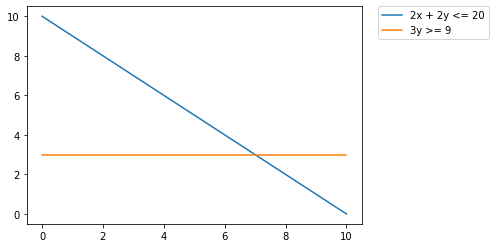

In [8]:
i = [[2,2],[0,3]]
ir = [20,9]
s = [0,1]
graph_inec(i,ir,s)

In [9]:
def intersection(L1, L2, R1, R2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = R1 * L2[1] - L1[1] * R2
    Dy = L1[0] * R2 - R1 * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

2 2 0 20
0 3 1 9


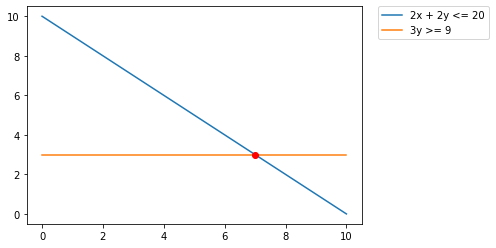

In [10]:
graph_inec(i,ir,s)
R = intersection([2,2],[0,3],20,9)
pyplot.plot(R[0],R[1],'ro')

In [11]:
def graph_inter(ineq,ineq_r):
    interX = []
    interY = []
    inter = []
    for ine1 , r1 in zip(ineq,ineq_r):
        for ine2 , r2 in zip(ineq,ineq_r):
            R = intersection(ine1,ine2,r1,r2)
            if R and R[0]>0 and R[1]>0:
                if [R[0],R[1]] not in inter:
                    interX.append(R[0])
                    interY.append(R[1])
                    inter.append([R[0],R[1]])
    for ine1 , r1 in zip(ineq,ineq_r):
#         print(ine1,r1)
        if ine1[0] != 0:
            interX.append(r1/ine1[0])
            interY.append(0)
            inter.append([r1/ine1[0],0])
        if ine1[1] != 0:
            interY.append(r1/ine1[1])
            interX.append(0)
            inter.append([0,r1/ine1[1]])
    
    interX.append(0)
    interY.append(0)
    inter.append([0,0])
    pyplot.plot(interX,interY,'ro')
    return interX,interY , inter

5 4 0 27000
5 15 0 43200


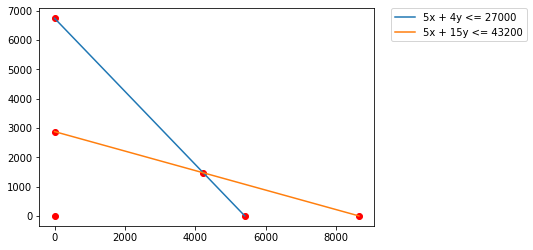

In [12]:
# ineq = [[2,4],[3,0],[0,3],[0,1]]   
# ineq_r = [20,5,8,2]
# ineq_s = [1,0,1,1]


# ineq = [[1,1],[3,4]]   
# ineq_r = [20,72]
# ineq_s = [0,0]

ineq = [[5,4],[5,15]]   
ineq_r = [27000,43200]
ineq_s = [0,0]

interX,interY , inter = graph_inter(ineq,ineq_r)
graph_inec(ineq,ineq_r,ineq_s)

In [13]:
inter

[[4221.818181818182, 1472.7272727272727],
 [5400.0, 0],
 [0, 6750.0],
 [8640.0, 0],
 [0, 2880.0],
 [0, 0]]

## TODO: 
- [x] Una función que le des la inecuación en texto ej: 2x+3y>=20 y te devuelva [2,3] [20] [0].**El =< , >= se representarían como [0,1]**
- [x] Representar el menor igual y mayor igual (>= , <=) en las inecuaciones lineales
- [x] Determinar la region probando las intersecciónes en todas las inecuaciones. Si es falso esa intersección no pertenece a la región 

In [14]:
def comprobar_region(ineq,ineq_r,ineq_s,inter):
    interR = []
    for i in inter:
        valido = True
        for ine,r,s in zip(ineq,ineq_r,ineq_s):
            p = int((ine[0]*i[0]) + (ine[1]*i[1]))
            #print(p)
            if s == 0:
                if p <= r:
                    pass
                else:
                    print(p," ",r)
                    valido = False
            if s == 1:
                if p >=r:
                    pass
                else:
                    valido =False
                    print(p," ",r,">=")
                
        if valido:
            interR.append([int(i[0]),int(i[1])])
            #interR.append([int(i[0]),int([1])])
    
    
    return interR

In [15]:
inter

[[4221.818181818182, 1472.7272727272727],
 [5400.0, 0],
 [0, 6750.0],
 [8640.0, 0],
 [0, 2880.0],
 [0, 0]]

In [16]:
inter = comprobar_region(ineq,ineq_r,ineq_s,inter)

101250   43200
43200   27000


In [17]:
inter

[[4221, 1472], [5400, 0], [0, 2880], [0, 0]]

In [24]:
def max_obj(obj,inter):
    maximo = 0
    for i in inter:
        m = obj[0]*i[0] + obj[1]*i[1]
        if m> maximo:
            maximo = m
            intersect = [i[0],i[1]]
    return maximo,intersect
def min_obj(obj,inter):
    minimo = 100000000
    for i in inter:
        m = obj[0]*i[0] + obj[1]*i[1]
        if m< minimo:
            minimo = m
            intersect = [i[0],i[1]]
    return minimo,intersect
        
    

In [19]:
m, i = min_obj([20,18],inter)

In [20]:
m,i

(0, [0, 0])

In [21]:
def linearp():
    f_obj , ineq , ineq_s ,ineq_r = input_data()
    graph_inec(ineq,ineq_r,ineq_s)
    interX,interY , inter = graph_inter(ineq,ineq_r)
    inter = comprobar_region(ineq,ineq_r,ineq_s,inter)
    max_obj, max_coord = min_obj(f_obj,inter)
    min_obj, min_coord = max_obj(f_obj,inter)
    pyplot.title("Gráfica de las indecuaciones")
    return max_obj,max_coord, min_obj,min_coord
    
    

Según la funcion objetivo ax+by introduce a: 80
Según la funcion objetivo ax+by introduce b: 120
Cuantas inecuaciones desea ingresar [3,8] 2


Inequacion Número 1:


Ingrese inecuación: (Ej: 2x + 3y <= 4 o 10x + 2y >= 4) x + y <= 80


extract: 1, 1 ,0 ,80
Inequacion Número 2:


Ingrese inecuación: (Ej: 2x + 3y <= 4 o 10x + 2y >= 4) 2x + 6y <= 240


extract: 2, 6 ,0 ,240
1 1 0 80
2 6 0 240
480   240
120   80


UnboundLocalError: local variable 'min_obj' referenced before assignment

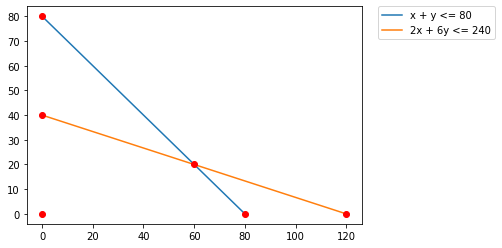

In [23]:
# 3x + 6y >= 24
# 3x + y >= 9
# 2x + 3y. Minimizar
linearp()

[[0.47494519 0.75168731]
 [0.68892262 0.31789649]
 [0.44542481 0.32592617]
 [0.60533254 0.32117599]
 [0.50886708 0.53788744]
 [0.36208257 0.4805487 ]
 [0.63109789 0.39056875]
 [0.34596884 0.42595696]
 [0.61571634 0.64184258]
 [0.42596709 0.36643993]
 [0.44479722 0.56947756]
 [0.39863668 0.38392984]
 [0.35776248 0.51077031]
 [0.52757016 0.40448835]
 [0.42372302 0.35133808]
 [0.34508063 0.35897166]
 [0.69254262 0.60253   ]
 [0.54279083 0.33941981]
 [0.45276198 0.63978001]
 [0.51145656 0.45833252]
 [0.59484077 0.66359587]]


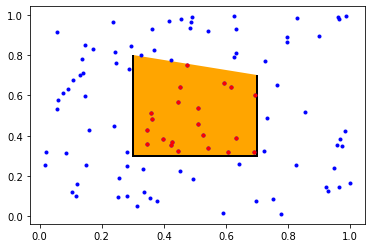

In [232]:
from pylab import *
from matplotlib.path import Path
import matplotlib.patches as patches

data = np.random.rand(100,4)

verts = [(0.3, 0.8), (0.3, 0.3), (0.7, 0.3), (0.7, 0.7)]

path1 = Path(verts)
index = path1.contains_points(data[:,:2])

print(data[index, :2])

plot(data[:,0],data[:,1], 'b.')
patch = patches.PathPatch(path1, facecolor='orange', lw=2)
gca().add_patch(patch)
plot(data[index,0], data[index,1], 'r.')
